## Largest rectanglie inside a circle with radius of R
In this exmaple we are going to find the largest rectangle inside a circle with radius of R, there are different ways to define such problem but one of the easiest pathes is as follows

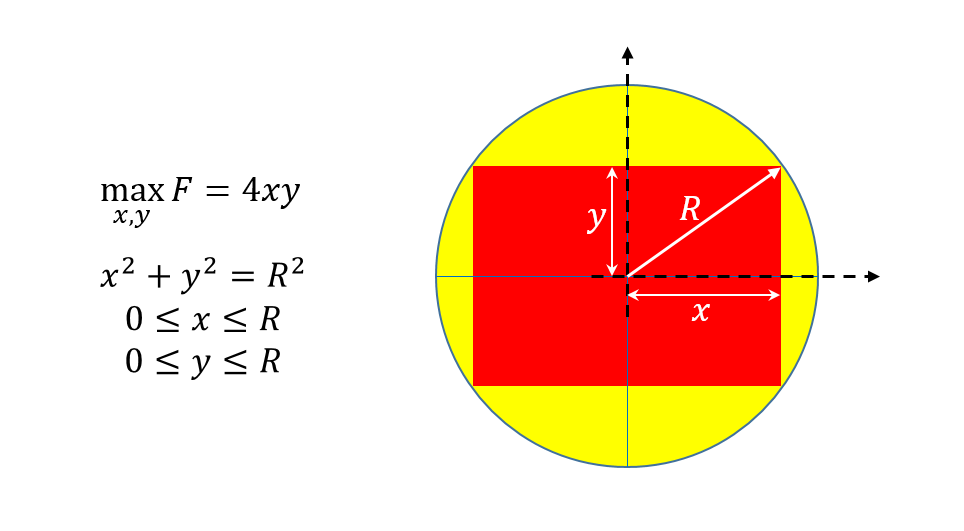

In [26]:
# import pyomo environment
import pyomo.environ as py

In [27]:
#define the model you can use a varaible like m or model 
m = py.ConcreteModel()
crcR = 5
#Define parameters
m.R = py.Param(initialize=crcR)
# Define variables
m.x = py.Var(bounds=(0,m.R), initialize=m.R, domain=NonNegativeReals)
m.y = py.Var(bounds=(0,m.R), initialize=m.R, domain=NonNegativeReals)
#Define constraints 
m.C1 = py.Constraint(expr = m.x**2+m.y**2==m.R**2)
#Define objective function 
m.f1 = py.Objective(expr = 4*m.x*m.y, sense = maximize)

In [28]:
# Define a solver (this is not a linear program for sure) we use ipopt
solver = py.SolverFactory('ipopt')
results = solver.solve(m)

In [29]:
# print the results 
print("x= ", py.value(m.x))
print("y= ", py.value(m.y))
print("Objective value= ", py.value(m.f1))

x=  3.5355339059327373
y=  3.5355339059327373
Objective value=  49.99999999999999


To demonstrate the solution one can simply plot the circle and resulted rectangle and verify (just visually) the answer

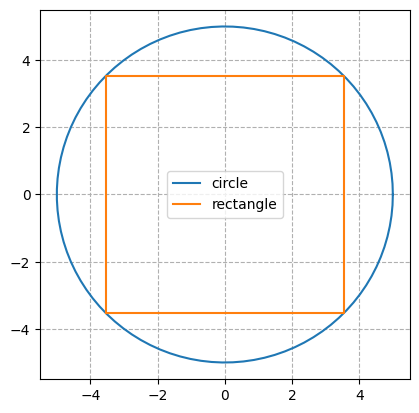

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Set the center and radius of the circle
center_x = 0
center_y = 0
radius = crcR

# Generate points along the circumference of the circle
theta = np.linspace(0, 2*np.pi, 100)
xc = center_x + radius * np.cos(theta)
yc = center_y + radius * np.sin(theta)

# Create the scatter plot
plt.plot(xc, yc, label='circle')

# Recangle corners 
# Define the coordinates of the rectangle's corners
xr = [-py.value(m.x), -py.value(m.x), py.value(m.x), py.value(m.x), -py.value(m.x)]
yr = [-py.value(m.y), py.value(m.y), py.value(m.y), -py.value(m.y), -py.value(m.y)]

plt.plot(xr, yr, label='rectangle')
plt.gca().set_aspect('equal')
plt.grid(True, linestyle='dashed')
plt.legend()

# Show the plot
plt.show()


 Be creative and check other possibilities like if one variable be fix what will happen to the other variable

In [31]:
m.x.unfix()
m.y.fix(1)
results = solver.solve(m)

In [32]:
# print the results 
print("x= ", py.value(m.x))
print("y= ", py.value(m.y))
print("Objective value= ", py.value(m.f1))

x=  4.898979485566357
y=  1
Objective value=  19.595917942265427


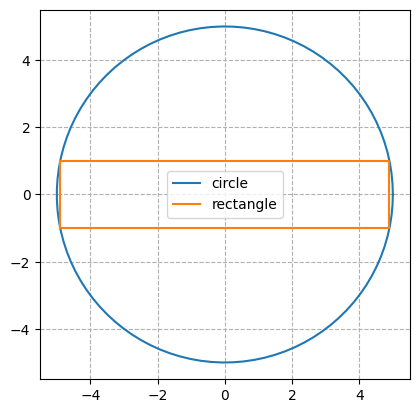

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Set the center and radius of the circle
center_x = 0
center_y = 0
radius = crcR

# Generate points along the circumference of the circle
theta = np.linspace(0, 2*np.pi, 100)
xc = center_x + radius * np.cos(theta)
yc = center_y + radius * np.sin(theta)

# Create the scatter plot
plt.plot(xc, yc, label='circle')

# Recangle corners 
# Define the coordinates of the rectangle's corners
xr = [-py.value(m.x), -py.value(m.x), py.value(m.x), py.value(m.x), -py.value(m.x)]
yr = [-py.value(m.y), py.value(m.y), py.value(m.y), -py.value(m.y), -py.value(m.y)]

plt.plot(xr, yr, label='rectangle')
plt.gca().set_aspect('equal')
plt.grid(True, linestyle='dashed')
plt.legend()

# Show the plot
plt.show()

In [34]:
print(results)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 1
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.11.1\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.058999061584472656
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

